# NYC Airbnb Data Analysis
### By - *Kartavya Desai*

### Data Abstract
Airbnb has transformed the travel industry since 2008, offering a unique and personalized way to explore the world. With millions of listings, Airbnb's vast database generates a wealth of data that is crucial for the company. By analyzing this data, Airbnb gains insights for security, business decisions, understanding customer and host behavior, guiding marketing initiatives, and implementing innovative services. This data-driven approach allows Airbnb to continuously improve its offerings and provide exceptional travel experiences globally.

#### Importing and loading dataset

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading dataset
df_ = pd.read_csv("nyc_dataset_19.csv")

In [3]:
#Dataset
df_.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Understanding out data

In [4]:
#Length of dataset
len(df_)

48895

In [5]:
#Shape
print("Shape: ",df_.shape)

Shape:  (48895, 16)


In [6]:
#Quick summary
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print("Summary: ", df_.describe(include="all"))

Summary:                     id            name         host_id host_name  \
count     48895.00000           48879     48895.00000     48874   
unique            NaN           47905             NaN     11452   
top               NaN  Hillside Hotel             NaN   Michael   
freq              NaN              18             NaN       417   
mean   19017143.23618             NaN  67620010.64661       NaN   
std    10983108.38561             NaN  78610967.03267       NaN   
min        2539.00000             NaN      2438.00000       NaN   
25%     9471945.00000             NaN   7822033.00000       NaN   
50%    19677284.00000             NaN  30793816.00000       NaN   
75%    29152178.50000             NaN 107434423.00000       NaN   
max    36487245.00000             NaN 274321313.00000       NaN   

       neighbourhood_group neighbourhood    latitude   longitude  \
count                48895         48895 48895.00000 48895.00000   
unique                   5           221         

In [7]:
#Datatype of columns
print("Col-wise dtype: ",df_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The dataset consists of about 49000 data-items and 16 columns which can provide rich information about the platform. 

#### Checking for missing and duplicates

In [8]:
df_.duplicated().sum()

0

In [9]:
df_.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Data do not have any duplicate records though it still consists of missing values in following columns : last_review, reviews_per_month, name, host_name which will be handled while cleaning the data.

### Data Cleaning

- The columns 'name' and 'host_name' are irrelavant considering the scope of our analysis hence it will be dropped. Further, incase of 'last_review' if the value is NaN than we can consider it simply don't exist moreover, the column is irrelavant so it will be dropped as well.
- The column 'reviews_per_month', if the value is NaN than we can consider that no reviews were given hence we will consider it 0.0, leading to replace NaN by 0.0

In [10]:
#Dropping columns
df_.drop(['name','host_name','last_review'], axis=1, inplace=True)
#examing the changes
df_.head(3)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21000,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [11]:
#Replacing values in reviews_per_month
df_.fillna({'reviews_per_month':0}, inplace=True)

In [12]:
#Cleaned data
df_.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Exploring the Data

#### Getting unique values from various columns

In [13]:
#Unique neighbourhood_groups
df_["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
#Unique room types
df_["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
#Number of unique neighbourhood
df_["neighbourhood"].nunique()

221

### Data Visualization

#### Univariate Analysis

In [16]:
#Setting the style
sns.set_theme(style="whitegrid", palette="Set2")

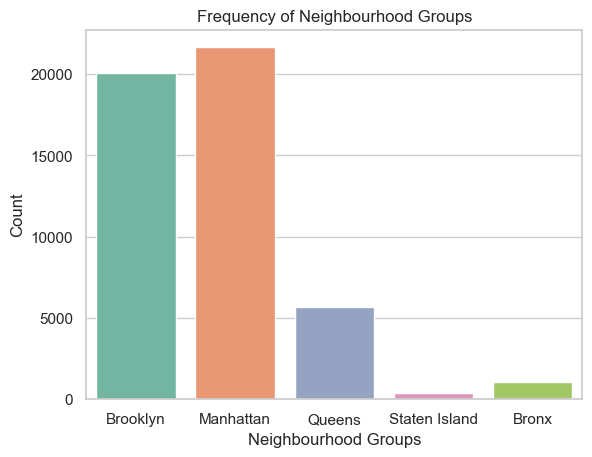

In [17]:
#Getting frequency of neighbourhood groups.
sns.countplot(x=df_["neighbourhood_group"])
plt.title("Frequency of Neighbourhood Groups")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Count")
plt.show()

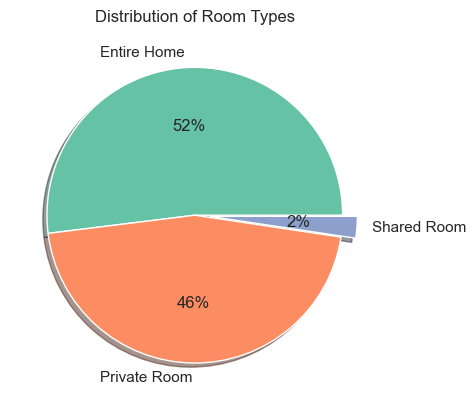

In [18]:
#Understanding types of rooms available
labels = ["Entire Home", "Private Room", "Shared Room"]
plt.pie(df_["room_type"].value_counts(), labels=labels, autopct='%.0f%%', shadow=True, explode=[0.0,0.0,0.1])
plt.title("Distribution of Room Types")
plt.show()

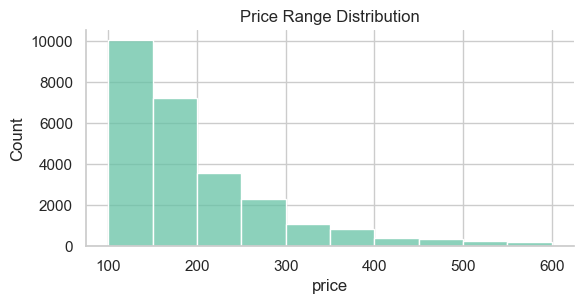

In [19]:
#Understanding price distribution over various airbnbs'
bins=[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
sns.displot(data=df_, x="price", bins=bins, height=3, aspect=2)
plt.title("Price Range Distribution")
plt.show()

In [20]:
#Top 10 Hosts
p1 = df_["host_id"].value_counts().head(10).to_frame().reset_index()

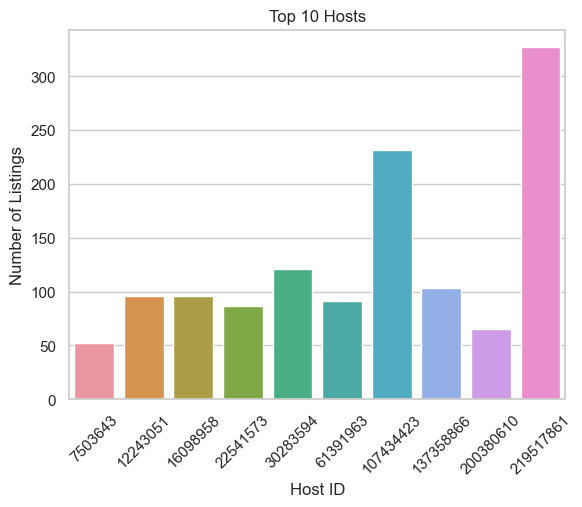

In [21]:
#Top 10 Hosts
sns.barplot(data=p1, x="index", y="host_id")
plt.title("Top 10 Hosts")
plt.xlabel("Host ID")
plt.ylabel("Number of Listings")
plt.xticks(rotation = 45)
plt.show() 

From the above analysis, we are able to extract these observations:
- Brooklyn and Manhattan have a major share over the NYC airbnb listings.
- Most properties available are for getting booked entirely followed by private rooms. Shared rooms have negligible share in the listing.
- The average Price range for a booking is between 100-200 USD
- Top hosts have atleast 50 properties over the NYC.

#### Bivariate Analysis

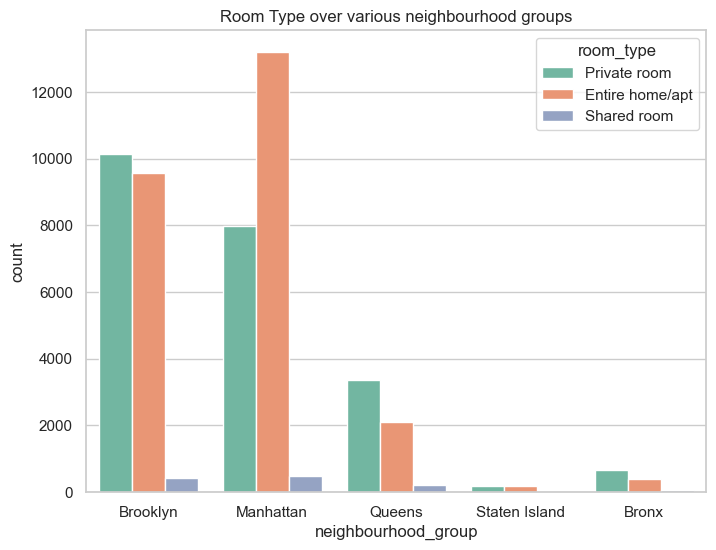

In [22]:
#Room Type in each neighbourhood group
plt.figure(figsize=(8,6))
sns.countplot(data=df_, x="neighbourhood_group", hue="room_type")
plt.title("Room Type over various neighbourhood groups")
plt.show()

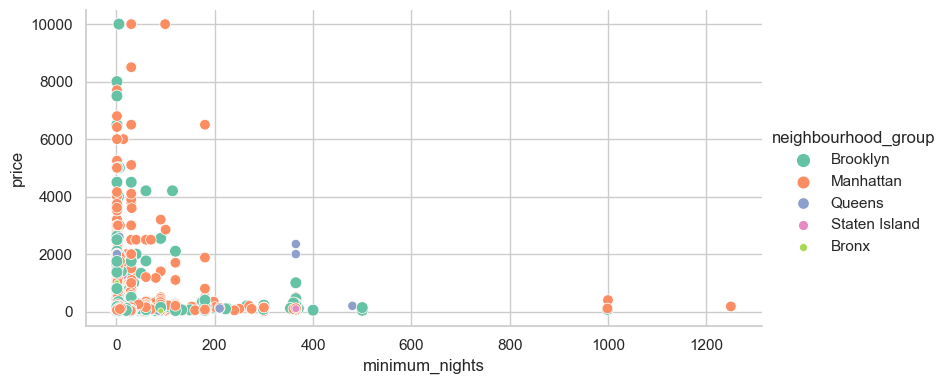

In [23]:
sns.relplot(data=df_, x="minimum_nights", y="price", hue="neighbourhood_group",size="neighbourhood_group", height=4, aspect=2)
plt.show()

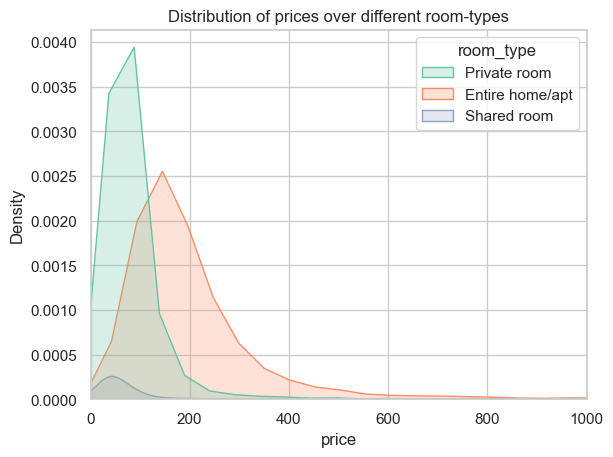

In [24]:
sns.kdeplot(data=df_, x="price", hue="room_type", fill=True)
plt.title("Distribution of prices over different room-types")
plt.xlim(0,1000)
plt.show()

In [25]:
# sns.relplot(data=df_, x="reviews_per_month", y="price", hue="room_type", style="neighbourhood_group", height=4, aspect=2)
# plt.xlim(-10,30)
# plt.ylim(-1000,10500)
# plt.show()

In [26]:
p3 = df_.groupby("room_type").agg("mean")[["price", "reviews_per_month", "number_of_reviews"]]
p3

,price,reviews_per_month,number_of_reviews
room_type,,,
Entire home/apt,211.79425,1.04551,22.84242
Private room,89.78097,1.14349,24.11296
Shared room,70.12759,1.07334,16.60000


In [27]:
p4 = df_[df_["price"] < 500]

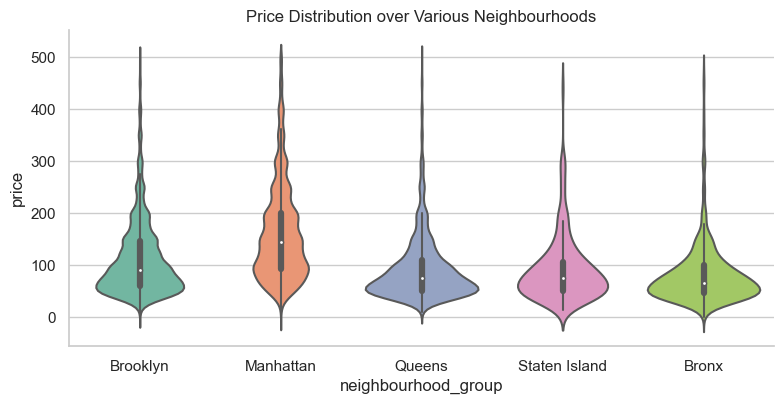

In [28]:
#Considering the dataframe p4 (with removed outliers) to understand the price distribution over various neighbourhoods.
sns.catplot(data=p4, x="neighbourhood_group", y="price", kind="violin", height=4, aspect=2)
plt.title("Price Distribution over Various Neighbourhoods")
plt.show()

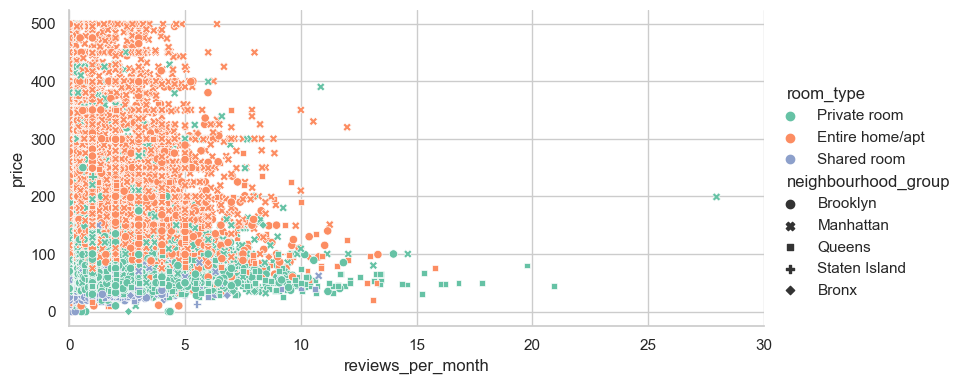

In [29]:
sns.relplot(data=p4, x="reviews_per_month", y="price", hue="room_type", style="neighbourhood_group", height=4, aspect=2)
plt.xlim(0,30)
# plt.ylim(-1000,10500)
plt.show()

Insights from Bivariate analysis.
- Private rooms dominate over each neighbourhood except Manhattan.
- Distribution of Price Range can be observed clearly
- There are generally not much reviews per month in properties irrespective of their prices which indicates that customer is not interested in reviewing the property.
- Average price by room type can be observed by df p3

In [30]:
df_.head(2)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21000,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38000,2,355


In [31]:
#Top 10 neighbourhoods
df_["neighbourhood"].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [32]:
#Getting data of top 10 neighbourhoods only.
p5=df_.loc[df_['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
p5.head(2)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00000,1,365


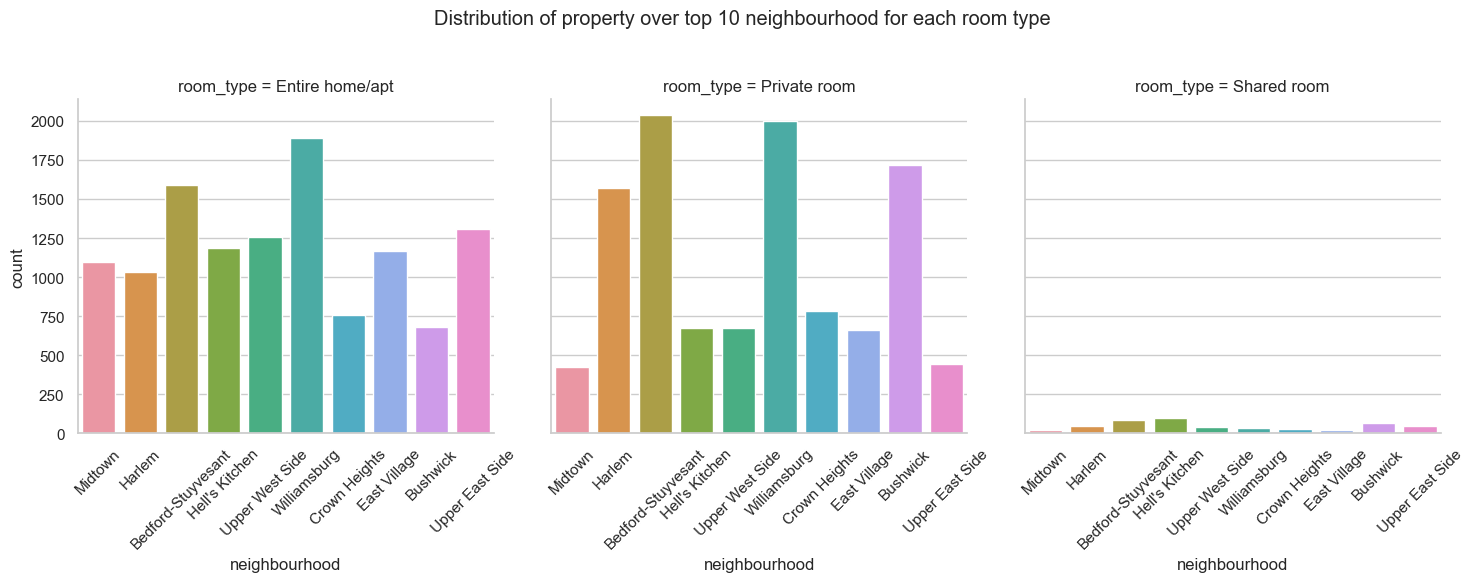

In [33]:
k1 = sns.catplot(data=p5, x="neighbourhood", col="room_type", kind="count")
k1.set_xticklabels(rotation=45)
k1.fig.subplots_adjust(top=0.8)
k1.fig.suptitle('Distribution of property over top 10 neighbourhood for each room type')
plt.show()

### Understanding Top Host
Analysing the data of Top Host will help us have insights to understand the market, and may help in understanding a potential business in better way.

In [34]:
#What does the top host does!
print("Our top host: 219517861")
top_host = df_.loc[df_["host_id"] == 219517861]

Our top host: 219517861


In [35]:
top_host["neighbourhood_group"].value_counts()

Manhattan    327
Name: neighbourhood_group, dtype: int64

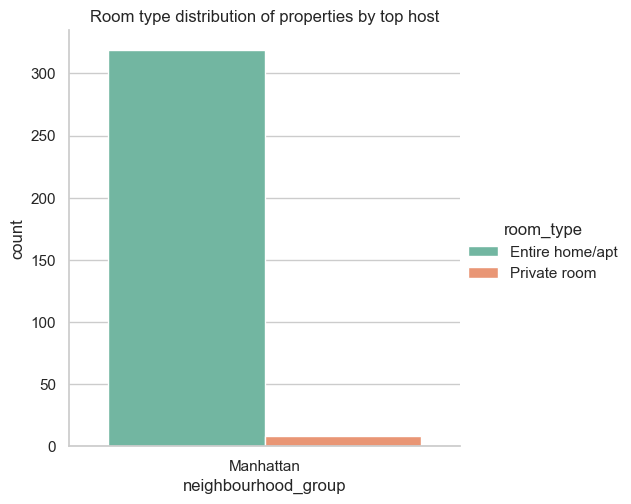

In [36]:
sns.catplot(data=top_host, x="neighbourhood_group", kind="count", hue="room_type")
plt.title("Room type distribution of properties by top host")
plt.show()

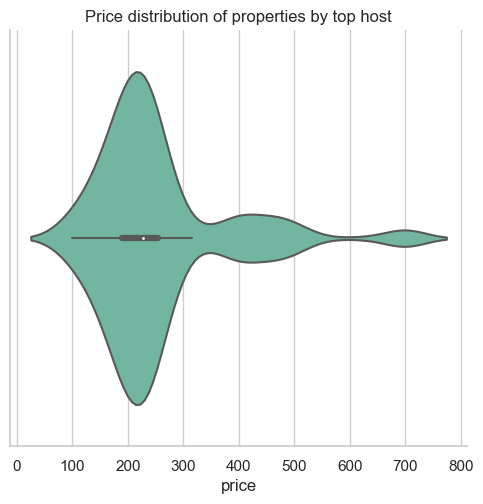

In [37]:
sns.catplot(data=top_host, x="price", kind="violin")
plt.title("Price distribution of properties by top host")
plt.show()

In [38]:
top_host.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,219517861,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00000,327,309
38294,30181945,219517861,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73000,327,219
38588,30347708,219517861,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60000,327,159
39769,30937590,219517861,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86000,327,91
39770,30937591,219517861,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59000,327,81


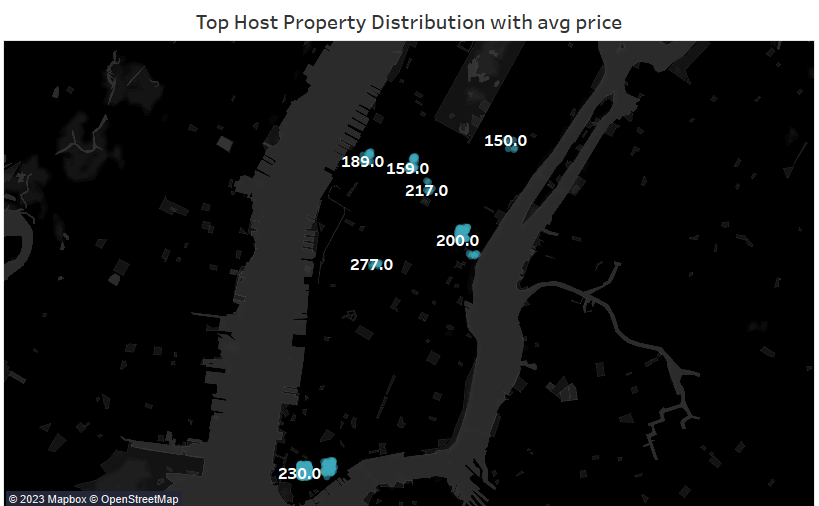

Top host have properties in Manhattan only. The average price for a room is around 100-300 USD. The property type only includes either entire house or private rooms